### In this notebook I will explore how to import, clean, and query geospatial data using both pandas and geopandas. More specifically, I will combine wind turbine point locations with a polygon layer that indicates how much wind energy can potentially be generated from any given location. I'll start by looking at my home state of Kansas and then compare those values to the rest of the United States.

In [85]:
import pandas as pd
import geopandas as gpd

In [86]:
wind = pd.read_csv("uswtdbCSV/uswtdb.csv", encoding='latin-1')

In [87]:
wind_gdf= gpd.GeoDataFrame(wind,geometry = gpd.points_from_xy(wind.xlong,wind.ylat),crs=4326)

In [88]:
type(wind_gdf)

geopandas.geodataframe.GeoDataFrame

In [89]:
wind_KS = gpd.GeoDataFrame(wind[wind["t_state"] == "KS"])

In [90]:
type(wind_KS)

geopandas.geodataframe.GeoDataFrame

In [91]:
wind_KS.sort_values(["p_year"], ascending = True).reset_index(drop = True).drop(['xlong','ylat'], axis=1)

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_rd,t_rsa,t_ttlh,retrofit,retrofit_year,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,geometry
0,3012413,20-002073,2001-ACE-1509-OE,25241.0,55734.0,KS,Gray County,20069,Gray County Wind Farm Montezuma),2001.0,...,47.0,1734.94,88.4,0,NaN,3,3,5/29/2017,Digital Globe,POINT (-100.38409 37.57769)
1,3012338,20-002195,2001-ACE-1433-OE,25423.0,55734.0,KS,Gray County,20069,Gray County Wind Farm Montezuma),2001.0,...,47.0,1734.94,88.4,0,NaN,3,3,5/29/2017,Digital Globe,POINT (-100.35449 37.62079)
2,3012333,20-002190,2001-ACE-1428-OE,25394.0,55734.0,KS,Gray County,20069,Gray County Wind Farm Montezuma),2001.0,...,47.0,1734.94,88.4,0,NaN,3,3,5/29/2017,Digital Globe,POINT (-100.38219 37.61329)
3,3068572,20-002109,2001-ACE-1471-OE,25320.0,55734.0,KS,Gray County,20069,Gray County Wind Farm Montezuma),2001.0,...,47.0,1734.94,88.4,0,NaN,3,3,5/29/2017,Digital Globe,POINT (-100.38589 37.59232)
4,3012382,20-002102,2001-ACE-1478-OE,25279.0,55734.0,KS,Gray County,20069,Gray County Wind Farm Montezuma),2001.0,...,47.0,1734.94,88.4,0,NaN,3,3,5/29/2017,Digital Globe,POINT (-100.38939 37.58529)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,3094392,20-061197,2019-WTE-4692-OE,NaN,NaN,KS,Neosho County,20133,unknown Neosho County,NaN,...,NaN,NaN,NaN,0,NaN,1,1,11/18/2020,Digital Globe,POINT (-95.33866 37.53727)
3915,3094453,20-061169,2019-WTE-4556-OE,NaN,NaN,KS,Neosho County,20133,unknown Neosho County,NaN,...,NaN,NaN,NaN,0,NaN,1,1,11/18/2020,Digital Globe,POINT (-95.33546 37.46664)
3916,3094381,20-061173,2019-WTE-4561-OE,NaN,NaN,KS,Neosho County,20133,unknown Neosho County,NaN,...,NaN,NaN,NaN,0,NaN,1,1,12/1/2020,Digital Globe,POINT (-95.28118 37.43768)
3917,3093465,20-059540,2019-WTE-5718-OE,NaN,NaN,KS,Thomas County,20193,unknown Thomas County,NaN,...,NaN,NaN,NaN,0,NaN,1,3,6/23/2019,Digital Globe,POINT (-101.02045 39.29917)


In [92]:
wind_speed = gpd.read_file('Kansas_Wind_High_Resolution/Kansas_50mwind.shp')

In [93]:
wind_speed.info()
wind_speed.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23815 entries, 0 to 23814
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        23815 non-null  int64   
 1   WPC       23815 non-null  int64   
 2   geometry  23815 non-null  geometry
dtypes: geometry(1), int64(2)
memory usage: 558.3 KB


,ID,WPC,geometry
0,1,1,"POLYGON ((-95.34531 40.00000, -95.33990 40.000..."
1,2,2,"POLYGON ((-95.30840 39.99380, -95.31986 39.994..."
2,3,3,"POLYGON ((-95.51881 39.99672, -95.51863 40.000..."
3,4,3,"POLYGON ((-95.51890 39.99492, -95.52124 39.994..."
4,5,1,"POLYGON ((-95.46979 39.99343, -95.47213 39.993..."


#### WPC stands for Wind Power Class. The higher the WPC score, the higher potential for wind generated energy. The degree of certainty with which the wind power class can be specified depends on three factors: the abundance and quality of wind data; the complexity of the terrain; and the geographical variability of the resource.

<AxesSubplot:>

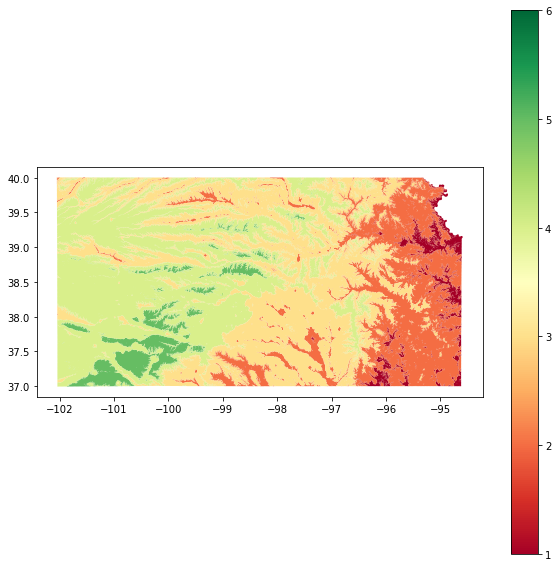

In [94]:
wind_speed.plot(column='WPC', cmap='RdYlGn', legend=True, figsize=(10,10))

#### Areas designated class 3 or greater are suitable for most utility-scale wind turbine applications, whereas class 2 areas are marginal for utility-scale applications but may be suitable for rural applications. Class 1 areas are generally not suitable, although a few locations (e.g., exposed hilltops not shown on the maps) with adequate wind resource for wind turbine applications may exist in some class 1 areas. With this info, Let's run a spatial join and transfer the score to each individual turbine in the state of Kansas.

In [95]:
KS_wps = gpd.sjoin(wind_KS, wind_speed)

In [96]:
KS_wps.head()

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,geometry,index_right,ID,WPC
223,3046776,20-030375,2013-WTE-8260-OE,NaN,58666.0,KS,Rush County,20165,Alexander,2015.0,...,3,3,6/1/2017,Digital Globe,-99.559250,38.404610,POINT (-99.55925 38.40461),15559,15560,5
225,3046770,20-030371,2013-WTE-8254-OE,NaN,58666.0,KS,Rush County,20165,Alexander,2015.0,...,3,3,6/1/2017,Digital Globe,-99.507919,38.426910,POINT (-99.50792 38.42691),15559,15560,5
227,3046767,20-030365,2013-WTE-8249-OE,NaN,58666.0,KS,Rush County,20165,Alexander,2015.0,...,3,3,10/31/2016,Digital Globe,-99.532265,38.426769,POINT (-99.53226 38.42677),15559,15560,5
228,3046765,20-030363,2013-WTE-8247-OE,NaN,58666.0,KS,Rush County,20165,Alexander,2015.0,...,3,3,6/1/2017,Digital Globe,-99.542793,38.435001,POINT (-99.54279 38.43500),15559,15560,5
232,3046768,20-030366,2013-WTE-8251-OE,NaN,58666.0,KS,Rush County,20165,Alexander,2015.0,...,3,3,6/1/2017,Digital Globe,-99.564278,38.412891,POINT (-99.56428 38.41289),15559,15560,5


<AxesSubplot:>

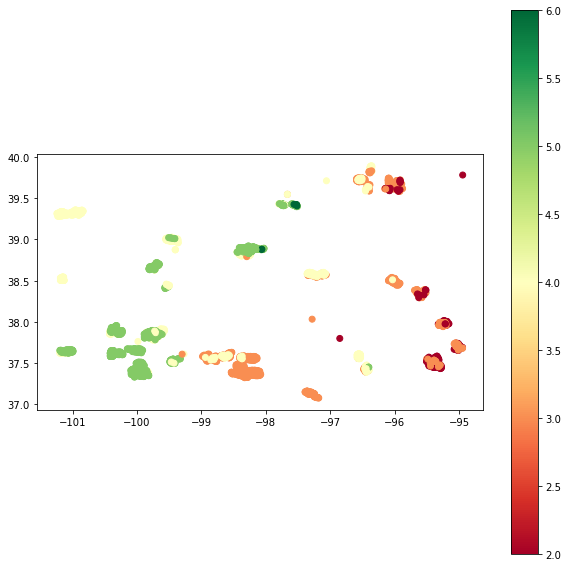

In [97]:
KS_wps.plot(column='WPC', cmap='RdYlGn', legend=True, figsize=(10,10))

KS_sum

In [98]:
KS_sum = pd.DataFrame(KS_wps["WPC"].value_counts()).sort_index()

In [99]:
KS_sum

,WPC
2,232
3,1212
4,1021
5,1449
6,5


#### How do the Kansas WPC scores compare to other states? Let's try to automate the previous workflow by joining our USA wind turbine POINT locations (wind_gdf) with each individual WPC state POLYGON data. Then query each individual state to compare the count of number.

In [100]:
import glob2

In [101]:
shp_list = []
files = glob2.glob('Shapefiles/**/*.shp',recursive = True)
for file in files:
    shp_list.append(file)

In [102]:
print(shp_list)

['Shapefiles/Arkansas_Wind_High_Resolution/ar_50mwind.shp', 'Shapefiles/Tennessee_Wind_High_Resolution/TN_50mwind.shp', 'Shapefiles/Oklahoma_Wind_High_Resolution/Oklahoma_50mwind.shp', 'Shapefiles/Massachusetts_Wind_High_Resolution/massachusetts_50mwind.shp', 'Shapefiles/Pacific_Northwest_Regional_Wind_High_Resolution/pnw_50mwindnouma.shp', 'Shapefiles/Missouri_Wind_High_Resolution/missouri_50mwind.shp', 'Shapefiles/Alaska_Wind_High_Resolution/AK_50_Main.shp', 'Shapefiles/Alaska_Wind_High_Resolution/AK_50_SE.shp', 'Shapefiles/Kentucky_Wind_High_Resolution/KY_50mwind.shp', 'Shapefiles/California_Wind_High_Resolution/ca_50mwind.shp', 'Shapefiles/Colorado_Wind_High_resolution/Colorado_50mWind.shp', 'Shapefiles/Indiana_Wind_High_Resolution/indiana_50mwind.shp', 'Shapefiles/Rhode_Island_Wind_High_Resolution/rhodeisl_50mwind.shp', 'Shapefiles/Arizona_Wind_High_Resolution/arizona_50mwind.shp', 'Shapefiles/Maine_Wind_High_Resolution/maine_50mwind.shp', 'Shapefiles/New_Hampshire_Wind_High_Resol

In [103]:
states_merge = []
for x in shp_list:
    state = x.split("/")[-1].split('_')[0]
    state = gpd.read_file(x)
    states_merge.append(state)

In [104]:
states_concat = pd.concat(states_merge)

In [105]:
states_concat.head()

,ID,PowerClass,geometry,WPC,windpwrd,wpc,GRIDCODE
0,10,1.0,"POLYGON ((-94.60766 36.48937, -94.60543 36.489...",NaN,NaN,NaN,NaN
1,13,1.0,"POLYGON ((-94.55855 36.48951, -94.55631 36.489...",NaN,NaN,NaN,NaN
2,19,1.0,"POLYGON ((-94.53616 36.48643, -94.53839 36.486...",NaN,NaN,NaN,NaN
3,23,2.0,"POLYGON ((-94.14327 36.49076, -94.13434 36.490...",NaN,NaN,NaN,NaN
4,24,2.0,"POLYGON ((-94.02716 36.49065, -94.02715 36.490...",NaN,NaN,NaN,NaN


#### Looks like the WPC score is housed in different columns. I'll combine the different columns into one.

In [106]:
states_concat['WPC_true']= states_concat.fillna(0)['PowerClass']\
+states_concat.fillna(0)['WPC']+states_concat.fillna(0)['windpwrd']\
+states_concat.fillna(0)['wpc']+states_concat.fillna(0)['GRIDCODE']

In [107]:
states_concat.drop(['PowerClass','WPC','windpwrd','wpc','GRIDCODE'], axis=1)

,ID,geometry,WPC_true
0,10,"POLYGON ((-94.60766 36.48937, -94.60543 36.489...",1.0
1,13,"POLYGON ((-94.55855 36.48951, -94.55631 36.489...",1.0
2,19,"POLYGON ((-94.53616 36.48643, -94.53839 36.486...",1.0
3,23,"POLYGON ((-94.14327 36.49076, -94.13434 36.490...",2.0
4,24,"POLYGON ((-94.02716 36.49065, -94.02715 36.490...",2.0
...,...,...,...
121669,29693,"POLYGON ((-103.08346 37.00026, -103.08357 36.9...",2.0
121670,29693,"POLYGON ((-103.09467 37.00027, -103.09470 36.9...",2.0
121671,22764,"POLYGON ((-103.09691 37.00027, -103.09693 37.0...",1.0
121672,29693,"POLYGON ((-103.13459 36.98282, -103.13236 36.9...",2.0


#### We now have our state polygon data in one dataset, which contains the WPC score. We can now transfer this score to the USA turbine location (we originally queried this dataset to just get the Kansas locations). Let's rerun the spatial join! 

In [108]:
USA_wps = gpd.sjoin(wind_gdf,states_concat)

<AxesSubplot:>

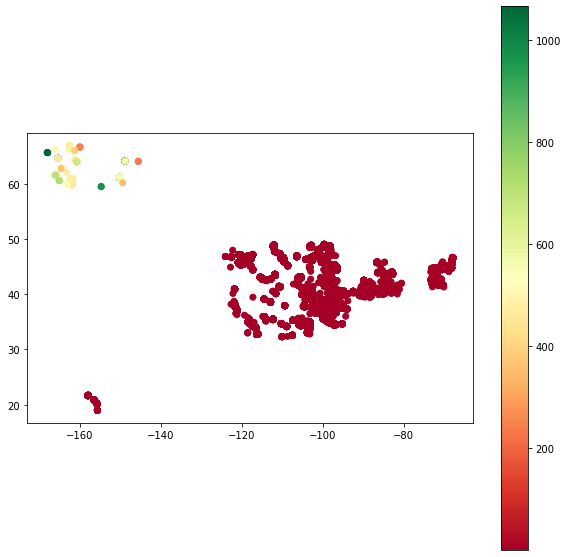

In [109]:
USA_wps.plot(column='WPC_true', cmap='RdYlGn', legend=True, figsize=(10,10))

#### It seems like something is wrong with the Alaska data, which is not being displayed with a range of 1-7. Let's see if we can take a closer look.

In [110]:
AK_ISO = USA_wps[USA_wps["t_state"]=='AK']

In [111]:
AK_ISO.head()

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,ylat,geometry,index_right,ID,PowerClass,WPC,windpwrd,wpc,GRIDCODE,WPC_true
3479,3088552,NaN,NaN,NaN,6566.0,AK,Bethel Census Area,2050,Bethel Wind Turbine,2018.0,...,60.781361,POINT (-161.88444 60.78136),204373,204374,NaN,NaN,458.0,4.0,NaN,462.0
17825,3036959,02-020200,2010-WTW-4916-OE,1868.0,NaN,AK,Wade Hampton Census Area,2270,Emmonak 1,2011.0,...,62.783401,POINT (-164.55878 62.78340),204373,204374,NaN,NaN,458.0,4.0,NaN,462.0
17826,3036961,02-020198,2010-WTW-4918-OE,1870.0,NaN,AK,Wade Hampton Census Area,2270,Emmonak 1,2011.0,...,62.783802,POINT (-164.56198 62.78380),204373,204374,NaN,NaN,458.0,4.0,NaN,462.0
17827,3036958,02-020201,2010-WTW-4915-OE,1867.0,NaN,AK,Wade Hampton Census Area,2270,Emmonak 1,2011.0,...,62.783199,POINT (-164.55728 62.78320),204373,204374,NaN,NaN,458.0,4.0,NaN,462.0
17828,3036960,02-020199,2010-WTW-4917-OE,1869.0,NaN,AK,Wade Hampton Census Area,2270,Emmonak 1,2011.0,...,62.783600,POINT (-164.56038 62.78360),204373,204374,NaN,NaN,458.0,4.0,NaN,462.0


#### okay, wow! So it looks like the column 'windpwd' should have never been included when combining the different columns. Whoops! Let's rebuild that final table.

In [112]:
states_concat['WPC_true']= states_concat.fillna(0)['PowerClass']\
+states_concat.fillna(0)['WPC']+states_concat.fillna(0)['wpc']+states_concat.fillna(0)['GRIDCODE']

In [113]:
states_concat.drop(['PowerClass','WPC','windpwrd','wpc','GRIDCODE'], axis=1)

,ID,geometry,WPC_true
0,10,"POLYGON ((-94.60766 36.48937, -94.60543 36.489...",1.0
1,13,"POLYGON ((-94.55855 36.48951, -94.55631 36.489...",1.0
2,19,"POLYGON ((-94.53616 36.48643, -94.53839 36.486...",1.0
3,23,"POLYGON ((-94.14327 36.49076, -94.13434 36.490...",2.0
4,24,"POLYGON ((-94.02716 36.49065, -94.02715 36.490...",2.0
...,...,...,...
121669,29693,"POLYGON ((-103.08346 37.00026, -103.08357 36.9...",2.0
121670,29693,"POLYGON ((-103.09467 37.00027, -103.09470 36.9...",2.0
121671,22764,"POLYGON ((-103.09691 37.00027, -103.09693 37.0...",1.0
121672,29693,"POLYGON ((-103.13459 36.98282, -103.13236 36.9...",2.0


In [114]:
USA_wpc = gpd.sjoin(wind_gdf,states_concat)

<AxesSubplot:>

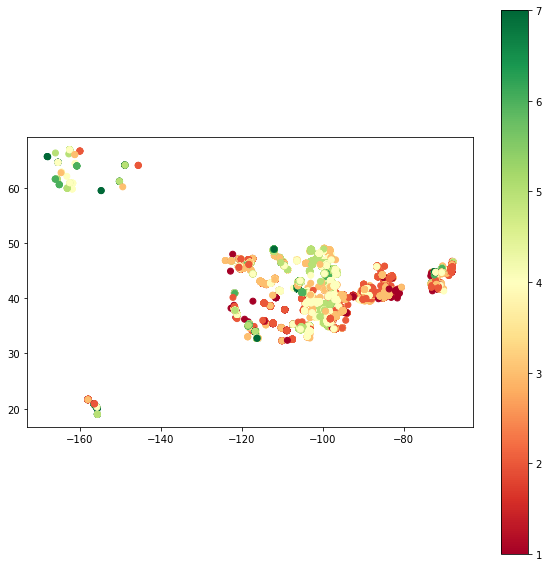

In [115]:
USA_wpc.plot(column='WPC_true', cmap='RdYlGn', legend=True, figsize=(10,10))

#### That was a close call! but the data is fixed now. That is why visualizing the dataset can be really helpful. It might be hard to see those outliers within the table when we have 1885451 records. But when we plotted the points it was easy to tell something with Alaska was wrong. Let's run some queries to see which data has the best wind energy potential. We will now try to get a count of the WPC scores from each state.

In [116]:
WPCperState = pd.DataFrame(USA_wpc.groupby(['t_state','WPC_true'])['t_state'].count())

In [117]:
WPCperState

t_state
t_state WPC_true         
AK      2.0             7
        3.0             4
        4.0            31
        5.0            33
        6.0            19
...                   ...
WY      3.0           123
        4.0           494
        5.0           509
        6.0           309
        7.0            85

[144 rows x 1 columns]

#### and let's grab the count of WPC score 5 for each state.

In [118]:
wpc5 = WPCperState.loc[(WPCperState.index.get_level_values('WPC_true')==5)]
wpc5

,,t_state
t_state,WPC_true,
AK,5.0,33
CA,5.0,798
CO,5.0,223
HI,5.0,5
KS,5.0,1449
MA,5.0,10
ME,5.0,21
MT,5.0,202
ND,5.0,472


#### How do these counts compare to our original KS dataset? Let's check!

In [119]:
KS_sum.iloc[[3]]

,WPC
5,1449


#### Let's check wpc score 6 as well.

In [120]:
wpc6 = WPCperState.loc[(WPCperState.index.get_level_values('WPC_true')==6)]
wpc6

,,t_state
t_state,WPC_true,
AK,6.0,19
CA,6.0,1341
CO,6.0,1
HI,6.0,23
KS,6.0,5
MA,6.0,16
ME,6.0,17
MT,6.0,84
ND,6.0,93


In [121]:
KS_sum.iloc[[4]]

,WPC
6,5


#### Wow so it looks like KS has the most wpc5 turbines but only a few wpc6, compared to the rest of the states. Finally, let's export this data as a shapefile so that others can display the points in QGIS or ArcMap/Pro.

In [122]:
USA_wpc.to_file('WindTurbineWPC')

/Users/liammartin/opt/anaconda3/envs/geopandas/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.
